# Goal 1: Feature Coorelation Heatmap
Show correlations between variables like fertilizer use, land use, and productivity to highlight significant predictors.

Columns in merged dataset: Index(['country_or_area', 'year', 'value_prod', 'value_land', 'value_fert'], dtype='object')


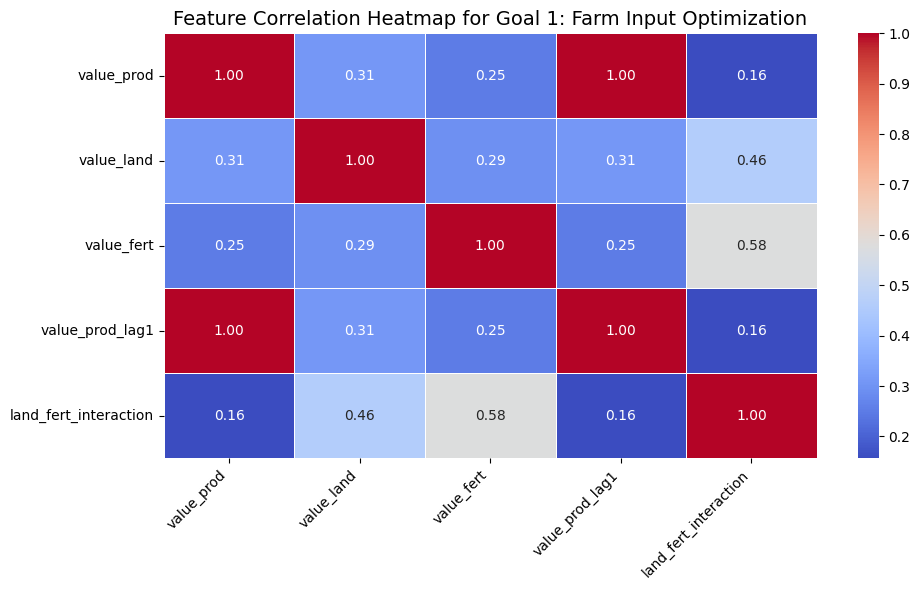

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the pre-saved merged dataset
merged_file_path = 'merged_fao_data.csv'  # Replace with the actual path to your saved file
merged_df = pd.read_csv(merged_file_path)

# Ensure all necessary columns are present
print("Columns in merged dataset:", merged_df.columns)

# Create lagged productivity (value_prod_lag1)
merged_df['value_prod_lag1'] = merged_df.groupby('country_or_area')['value_prod'].shift(1)

# Create interaction term between land use and fertilizer use (land_fert_interaction)
merged_df['land_fert_interaction'] = merged_df['value_land'] * merged_df['value_fert']

# Subset features for correlation analysis
goal1_features = ['value_prod', 'value_land', 'value_fert', 'value_prod_lag1', 'land_fert_interaction']

# Check if all features exist in the dataset
for feature in goal1_features:
    if feature not in merged_df.columns:
        print(f"Warning: {feature} not found in the dataset!")

# Drop rows with NaN values introduced by lagging
merged_df = merged_df.dropna(subset=goal1_features)

# Calculate the correlation matrix
correlation_matrix = merged_df[goal1_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Feature Correlation Heatmap for Goal 1: Farm Input Optimization', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Goal 2: Identify Sustainable Land Use Practices

/Users/prabha/Documents/CSIS-44608/datafun-04-notebooks/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prabha/Documents/CSIS-44608/datafun-04-notebooks/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prabha/Documents/CSIS-44608/datafun-04-notebooks/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prabha/Documents/CSIS-44608/datafun-04-notebooks/.venv/lib/python3.11/s

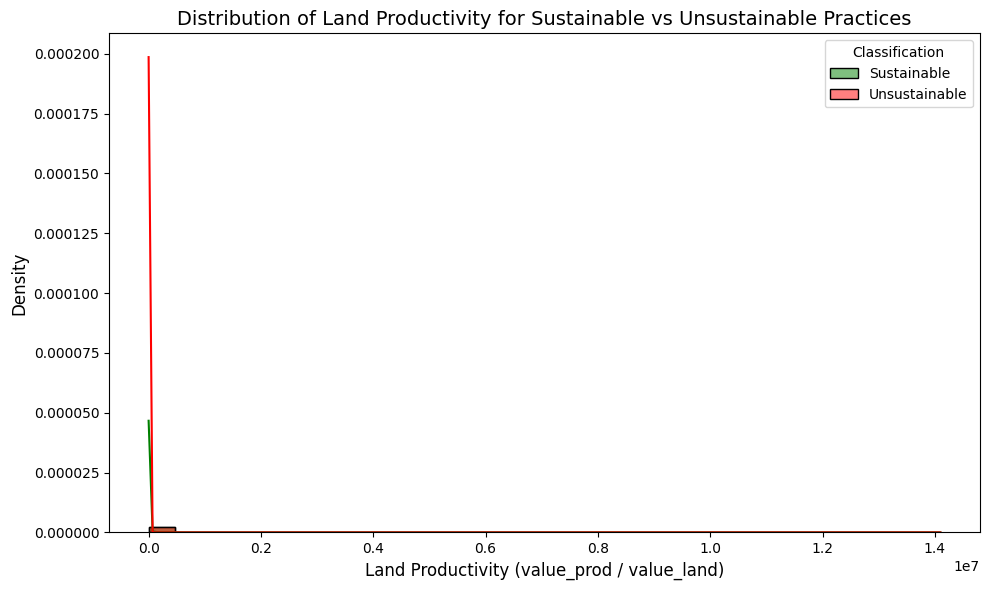

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_fao_data.csv'  # Replace with the correct path to your dataset
data = pd.read_csv(file_path)

# Define classification criteria (adjust as per your logic)
def classify(row):
    if row['value_land'] == 0:  # Handle division by zero
        return 'unsustainable'
    elif (row['value_prod'] / row['value_land'] > 100 and row['value_fert'] < 500):
        return 'sustainable'
    else:
        return 'unsustainable'

# Apply classification criteria
data['classification'] = data.apply(classify, axis=1)

# Create a new column for Land Productivity
data['land_productivity'] = data['value_prod'] / data['value_land']

# Plot the histogram for land productivity based on sustainability classification
plt.figure(figsize=(10, 6))

# Plot histograms for 'land_productivity' for both classifications
sns.histplot(data=data[data['classification'] == 'sustainable'], 
             x='land_productivity', 
             kde=True, 
             color='green', 
             label='Sustainable', 
             stat='density', 
             bins=30)

sns.histplot(data=data[data['classification'] == 'unsustainable'], 
             x='land_productivity', 
             kde=True, 
             color='red', 
             label='Unsustainable', 
             stat='density', 
             bins=30)

# Add labels and title
plt.title('Distribution of Land Productivity for Sustainable vs Unsustainable Practices', fontsize=14)
plt.xlabel('Land Productivity (value_prod / value_land)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Classification')

# Show the plot
plt.tight_layout()
plt.show()

# Goal 3: Forecast Sustainable Agricultural Productivity

Time-Series Line Plot: Plot historical productivity data along with the forecasted values, clearly distinguishing between past and future trends

/Users/prabha/Documents/CSIS-44608/datafun-04-notebooks/.venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


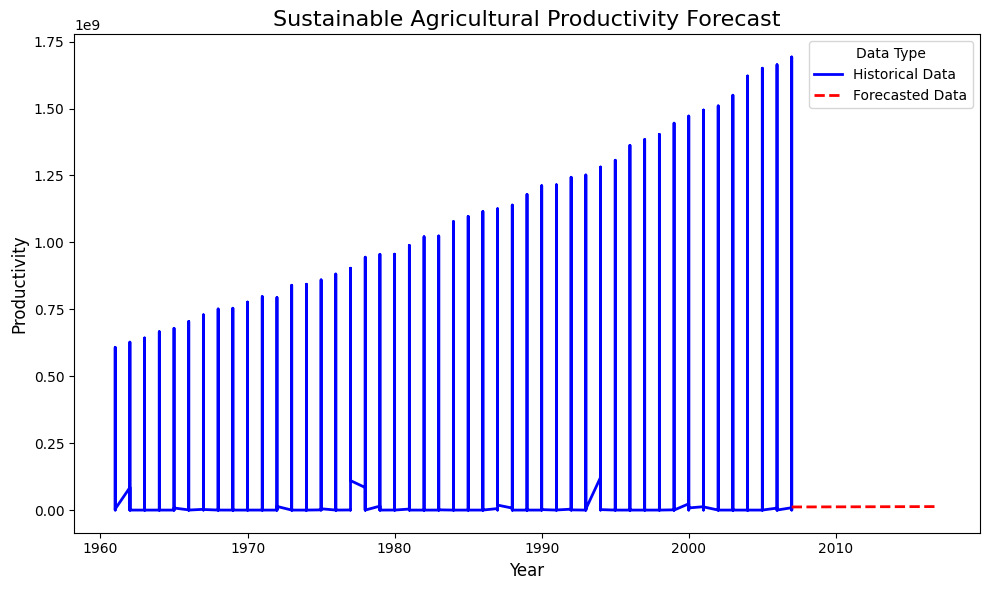

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'merged_fao_data.csv'  # Replace with the correct path to your dataset
data = pd.read_csv(file_path)

# Convert 'year' column to datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Sort data by 'year' in ascending order (optional)
data.sort_values('year', inplace=True)

# Create a 'year_num' column for linear regression (numeric form of 'year')
data['year_num'] = data['year'].dt.year

# Define X and y for the model
X = data[['year_num']]  # Feature (year_num)
y = data['value_prod']  # Target (productivity)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Forecast for the next 10 years (adjust as needed)
future_years = pd.date_range(start=data['year'].max(), periods=11, freq='Y').year

# Convert 'future_years' to a NumPy array and reshape
future_X = future_years.values.reshape(-1, 1)

# Predict the future values
forecasted_values = model.predict(future_X)

# Create a new DataFrame for the forecasted data
forecast_data = pd.DataFrame({'year': pd.to_datetime(future_years, format='%Y'), 'forecasted_value': forecasted_values})

# Plot the historical and forecasted data
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(data['year'], data['value_prod'], label='Historical Data', color='blue', linewidth=2)

# Plot forecasted data
plt.plot(forecast_data['year'], forecast_data['forecasted_value'], label='Forecasted Data', color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.title('Sustainable Agricultural Productivity Forecast', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Productivity', fontsize=12)
plt.legend(title='Data Type')

# Show the plot
plt.tight_layout()
plt.show()